# Test t_function parameter

To see if the tracing is an issue with toggling clean and also datamax

#### Need to delete tracing aperatures each time.



In [1]:
import os
import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt

In [76]:
# Chip number
chip = 3

# Nod file names
ms_names = ["CRIRE.2012-07-12T06:54:44.372_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T06:58:20.691_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:01:49.683_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:05:30.660_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:08:59.651_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:12:39.576_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:16:06.773_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:19:47.498_{0}.nod.ms.fits".format(chip),
]


In [77]:
#LOAD IN THE datamax SPECTRA

data_path = "/home/jneal/BD-DRACS/HD202206-1-copy_to_find_artifacts/manual_cycling/"

folders = ["clean_datamax10000_extras","clean_datamax7000","clean_datamax5000","clean_no_datamax10000_extras", "clean_no_datamax7000","clean_no_datamax5000"]
offsets = [-1000, 0, 1000, -1000, 0, 1000]
datamax_data = []
for folder in folders:
    
    data = fits.getdata(os.path.join(data_path, folder, ms_names[5]))
    
    if "10000" in folder:
        datamax_data.append(data[0][0])
    else:
        datamax_data.append(data)


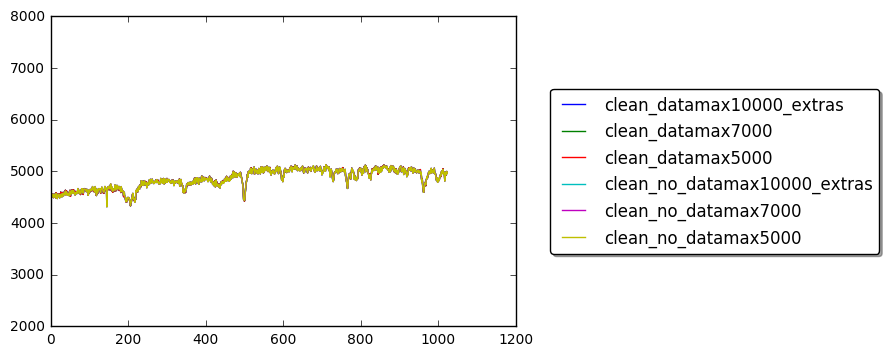

In [78]:
# Plotting datamax results

for label, data in zip(folders, datamax_data):
    plt.plot(data, "-", label=label)

plt.legend(loc="center right", bbox_to_anchor=(1.8, 0.5), ncol=1, fancybox=True, shadow=True)
  
plt.ylim([2000, 8000])
plt.show()

1
1
1
3


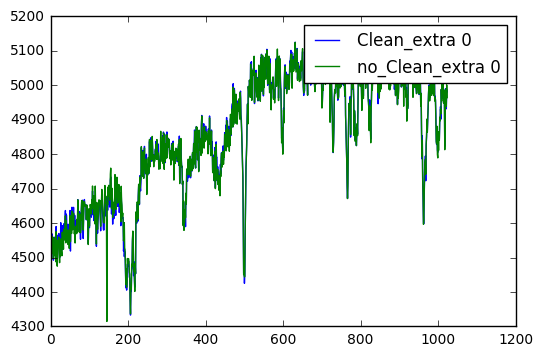

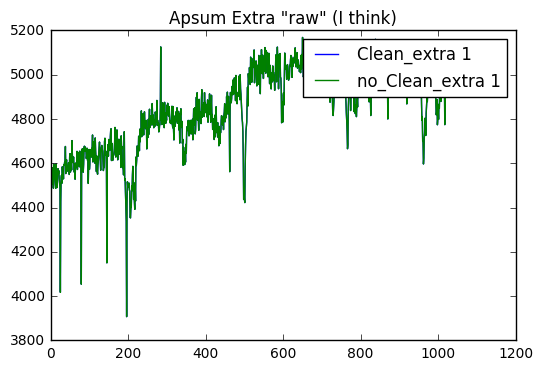

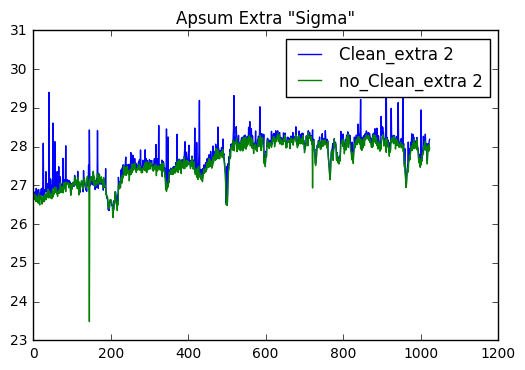

In [79]:
## Compare just the extra results

clean_extra = fits.getdata(os.path.join(data_path, "clean_datamax10000_extras", ms_names[5]))
no_clean_extra = fits.getdata(os.path.join(data_path, "clean_no_datamax10000_extras", ms_names[5]))

print(len(clean_extra[0]))
print(len(clean_extra[1]))
print(len(clean_extra[2]))
print(len(clean_extra))
#
plt.plot(clean_extra[0][0], label="Clean_extra 0")
plt.plot(no_clean_extra[0][0], label="no_Clean_extra 0")
plt.legend()
plt.show()


plt.plot(clean_extra[1][0], label="Clean_extra 1")
plt.plot(no_clean_extra[1][0], label="no_Clean_extra 1")
plt.legend()
plt.title('Apsum Extra "raw" (I think)')
plt.show()


plt.plot(clean_extra[2][0], label="Clean_extra 2")
plt.plot(no_clean_extra[2][0], label="no_Clean_extra 2")
plt.legend()
plt.title('Apsum Extra "Sigma"')
plt.show()


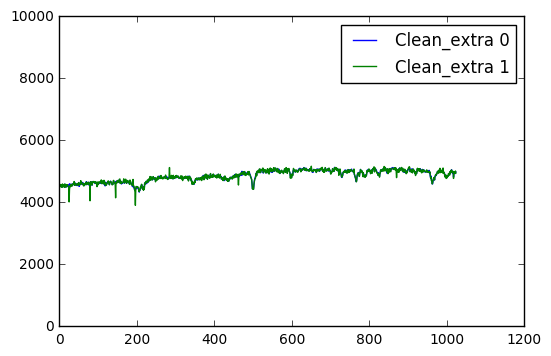

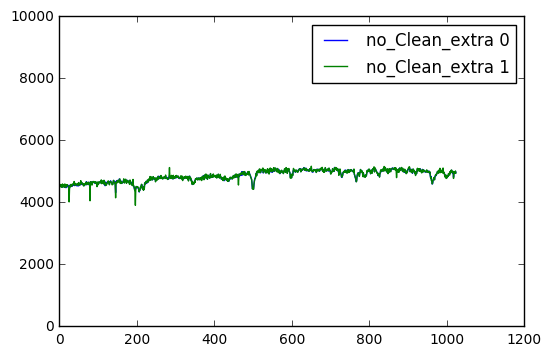

In [80]:
plt.plot(clean_extra[0][0], label="Clean_extra 0")
plt.plot(clean_extra[1][0], label="Clean_extra 1")
plt.legend()
plt.ylim([0,10000])
plt.show()


plt.plot(no_clean_extra[0][0], label="no_Clean_extra 0")
plt.plot(no_clean_extra[1][0], label="no_Clean_extra 1")
plt.legend()
plt.ylim([0,10000])
plt.show()



In [81]:
# Load in each sepectra an plot
#LOAD IN THE datamax SPECTRA

data_path = "/home/jneal/BD-DRACS/HD202206-1-copy_to_find_artifacts/"

folders = ["clean_datamax10000_extras","clean_datamax7000","clean_datamax5000","clean_no_datamax10000_extras", "clean_no_datamax7000","clean_no_datamax5000"]

all_datamax_nods = []
for nod in range(8):

    datamax_data = []
    for folder in folders:
    
        data = fits.getdata(os.path.join(data_path, folder, ms_names[nod]))
    
        if "10000" in folder:
            datamax_data.append(data[0][0])
        else:
            datamax_data.append(data)
    all_datamax_nods.append(datamax_data)

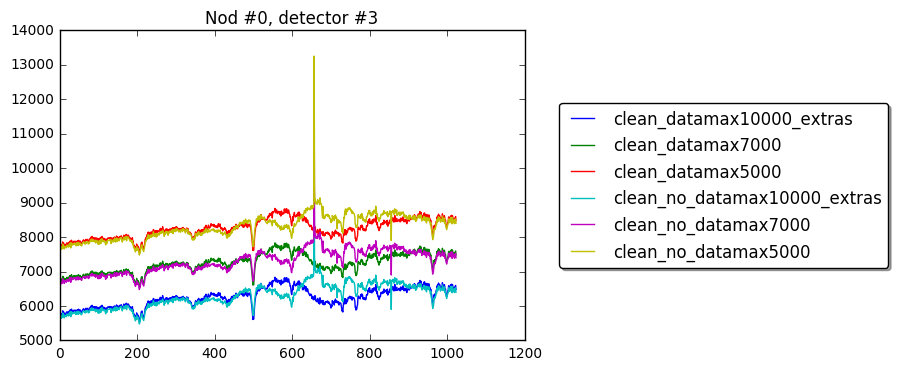

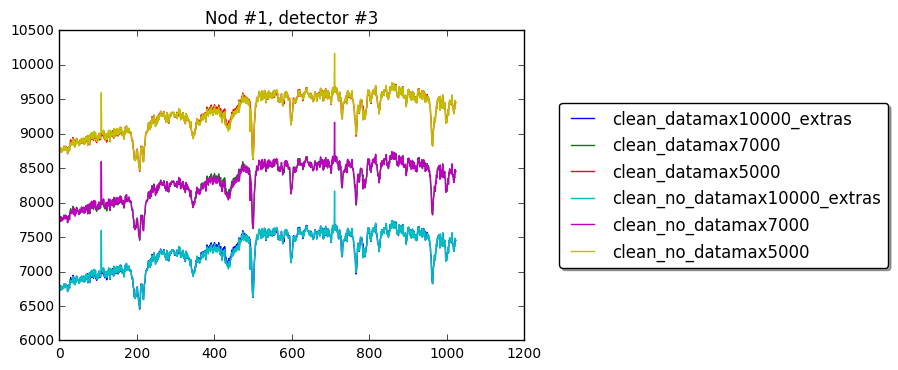

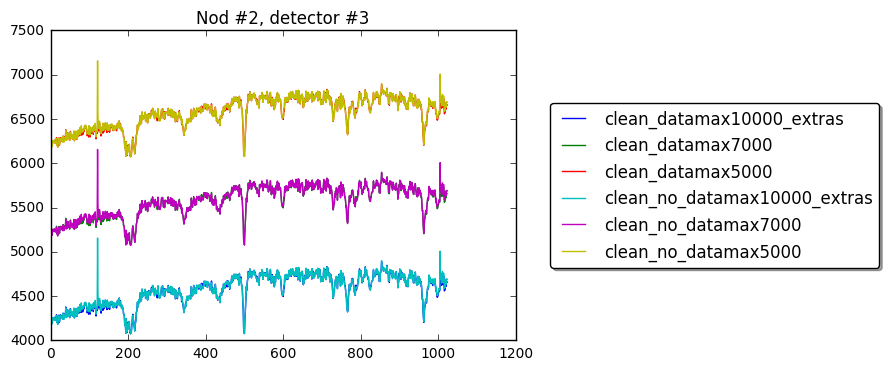

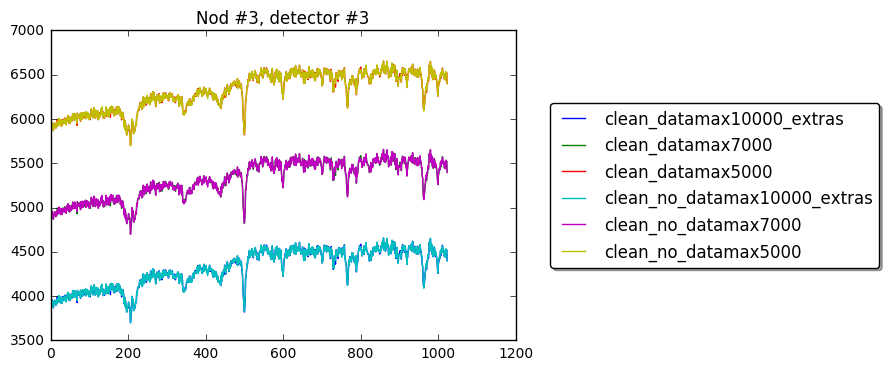

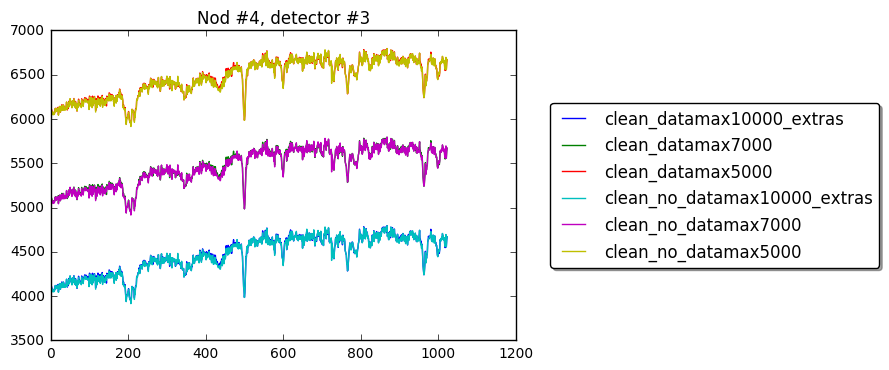

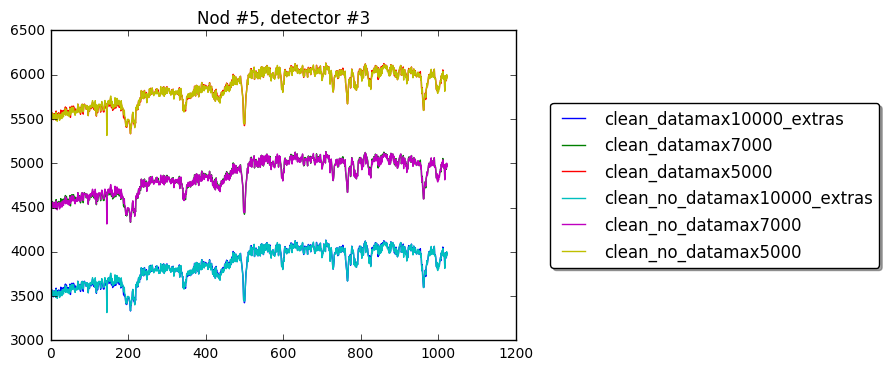

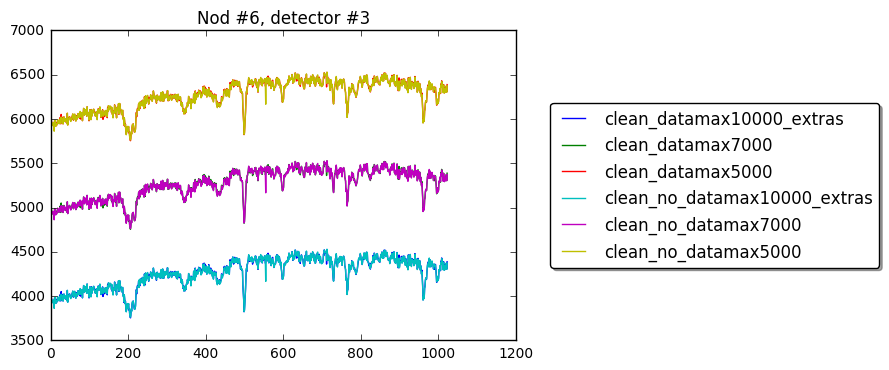

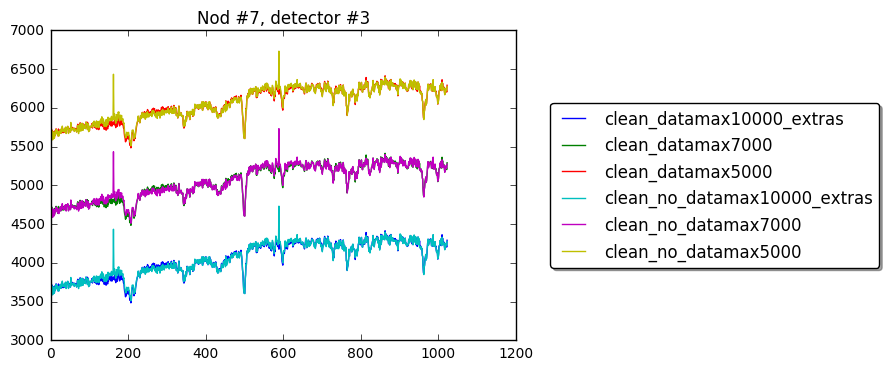

In [82]:
for nod in range(8):
    for label, data, offset in zip(folders, all_datamax_nods[nod], offsets):
        plt.plot(data + offset, "-", label=label)
    plt.title("Nod #{}, detector #{}".format(nod, chip))
    plt.legend(loc="center right", bbox_to_anchor=(1.8, 0.5), ncol=1, fancybox=True, shadow=True)
    plt.show()

Chips other than 2 are most likely the same because I did not delete the aperatures.

# Changing polynomial orders and functions



In [87]:
#LOAD IN THE datamax SPECTRA

# Chip number
chip = 2
# Nod file names
ms_names = ["CRIRE.2012-07-12T06:54:44.372_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T06:58:20.691_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:01:49.683_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:05:30.660_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:08:59.651_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:12:39.576_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:16:06.773_{0}.nod.ms.fits".format(chip),
        "CRIRE.2012-07-12T07:19:47.498_{0}.nod.ms.fits".format(chip), ]
data_path = "/home/jneal/BD-DRACS/HD202206-1-copy_to_find_artifacts/"

no_clean_folders = ["clean_no_cheb_o1",
           "clean_no_cheb_o2", 
           "clean_no_cheb_o5", 
           "clean_no_legendre_o1",
           "clean_no_legendre_o5",
           "clean_no_spline1_o1",
           "clean_no_spline1_o3",
           "clean_no_spline3_o1",
           "clean_no_spline3_o2",
           "clean_no_spline3_o5",
          ]

clean_folders = [["clean_spline1_o1",
                 "clean_spline1_o2",
                 "clean_spline1_o3",
                 "clean_spline1_o4",
                 "clean_spline1_o5"],
                 ["clean_spline3_o1",
                 "clean_spline3_o2",
                 "clean_spline3_o3",
                 "clean_spline3_o4",
                 "clean_spline3_o5"],
                 ["clean_cheb_o1",
                 "clean_cheb_o2",
                 "clean_cheb_o3",
                 "clean_cheb_o4",
                 "clean_cheb_o5"],
                 ["clean_legendre_o1",
                 "clean_legendre_o2",
                 "clean_legendre_o3",
                 "clean_legendre_o4",
                 "clean_legendre_o5"]
          ]
function_names = ["spline1", "spline3", "chebyshev", "legendre"]


NOD = 6     # 6 BAD ALSO for chip 2
no_clean_offsets = (np.arange(10)-5)*500
clean_offsets = (np.arange(len(clean_folders[0]))-np.floor(len(clean_folders[0])/2))*500
print(clean_offsets)

no_clean_data = []
for folder in no_clean_folders:
    data = fits.getdata(os.path.join(data_path, folder, ms_names[NOD]))
    no_clean_data.append(data)

    
clean_data = []
for folders in clean_folders:
    this_folder_data = []
    for folder in folders:
        data = fits.getdata(os.path.join(data_path, folder, ms_names[NOD]))
        #print(len(data))
        if len(data) == 3:
            this_folder_data.append(data[0][0])
        else:
            this_folder_data.append(data)
    clean_data.append(this_folder_data)

[-1000.  -500.     0.   500.  1000.]


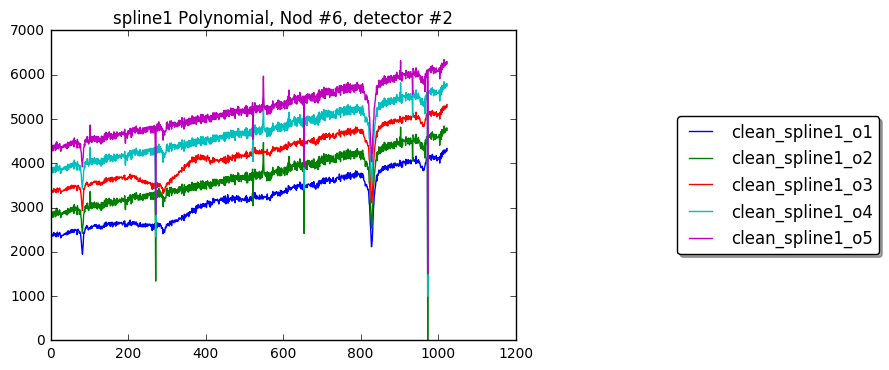

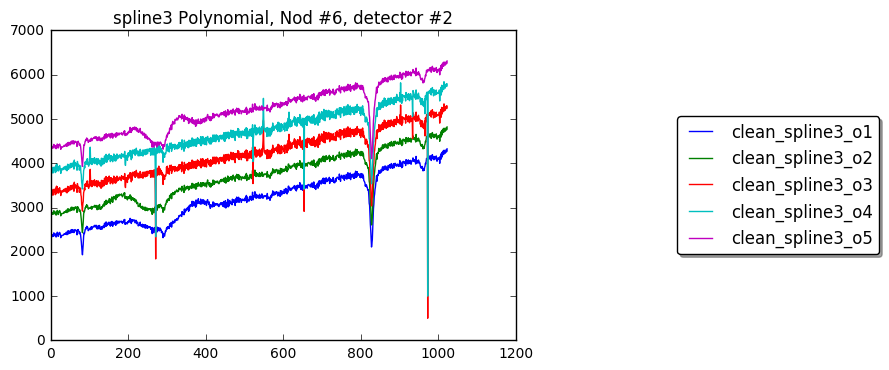

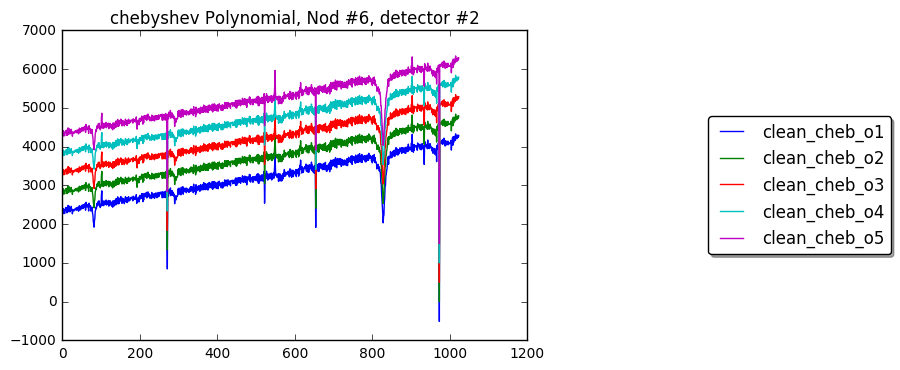

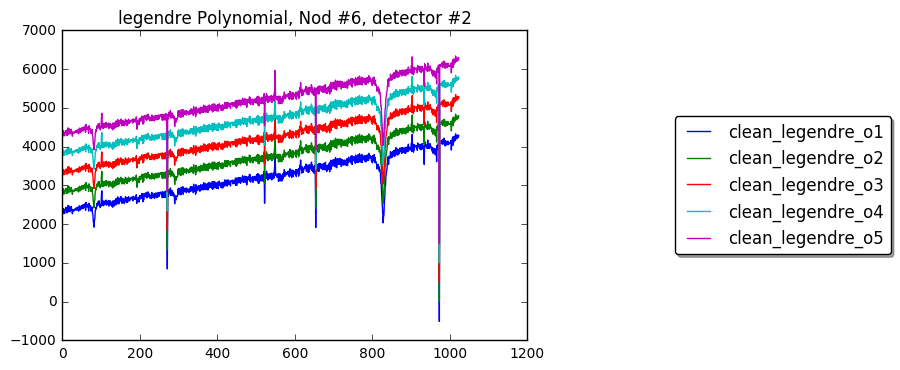

In [88]:
# plot Clean
for funct, name_list, data_list in zip(function_names, clean_folders, clean_data):
    
    for label, data, offset in zip(name_list, data_list, clean_offsets):
        plt.plot(data + offset, "-", label=label)
        #plt.plot(data, "-", label=label)
    plt.title("{2} Polynomial, Nod #{0}, detector #{1}".format(NOD, chip, funct))
    plt.legend(loc="center right", bbox_to_anchor=(1.8, 0.5), ncol=1, fancybox=True, shadow=True)
#plt.ylim([0, 11000])
    plt.show()

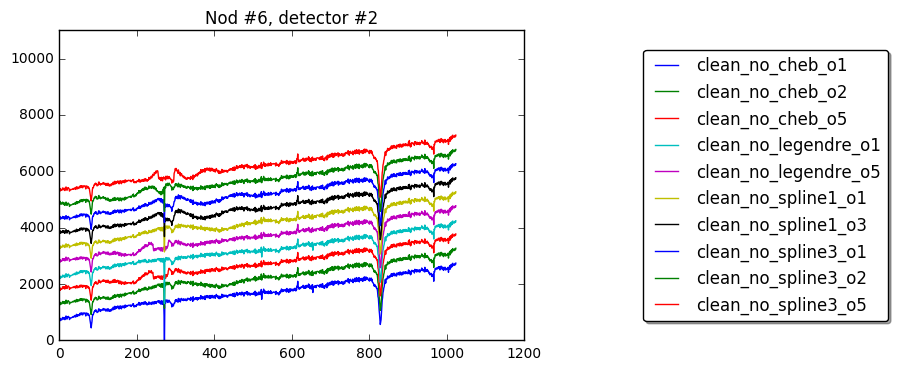

In [68]:
# plot no_clean
for label, data, offset in zip(no_clean_folders, no_clean_data, no_clean_offsets):
    plt.plot(data + offset, "-", label=label)
plt.title("Nod #{}, detector #{}".format(NOD, chip))
plt.legend(loc="center right", bbox_to_anchor=(1.8, 0.5), ncol=1, fancybox=True, shadow=True)
plt.ylim([0, 11000])
plt.show()


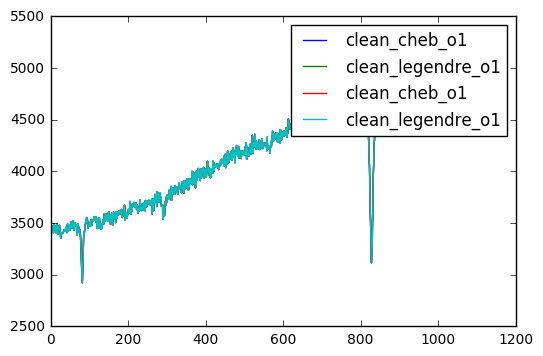

In [75]:

# Plot difference of chebyshev and legendre

plt.plot(clean_data[2][0],label=clean_folders[2][0])
plt.plot(clean_data[3][0], label=clean_folders[3][0])
plt.legend()
plt.show()